In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv', encoding='UTF-8-SIG')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [4]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [5]:
df.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [6]:
df.isnull().sum()

,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


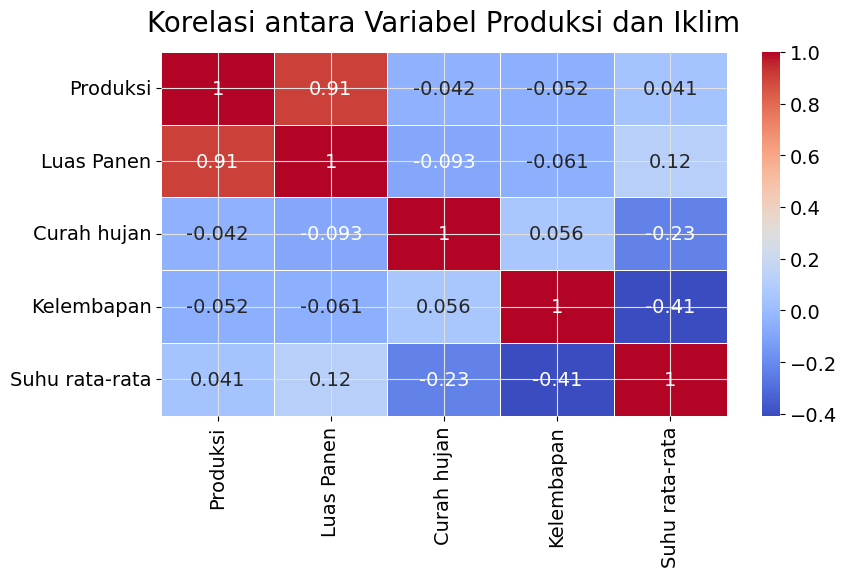

In [7]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 14,
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.grid': True,
    'grid.color': '#E0E0E0'
})
correlation_matrix = df[['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']].corr()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
plt.title('Korelasi antara Variabel Produksi dan Iklim', pad=15)
plt.tight_layout()
plt.show()

# **Correlation Analysis (Heatmap):**


*   There is a **strong positive correlation (0.91)** between **production and harvested area**, indicating that **expanding farmland directly boosts rice production**.
*   Climate variables such as **rainfall, humidity, and temperature** show a **weak correlation with production**, suggesting that **other factors (e.g., technology or soil quality)** might play a more significant role in productivity.


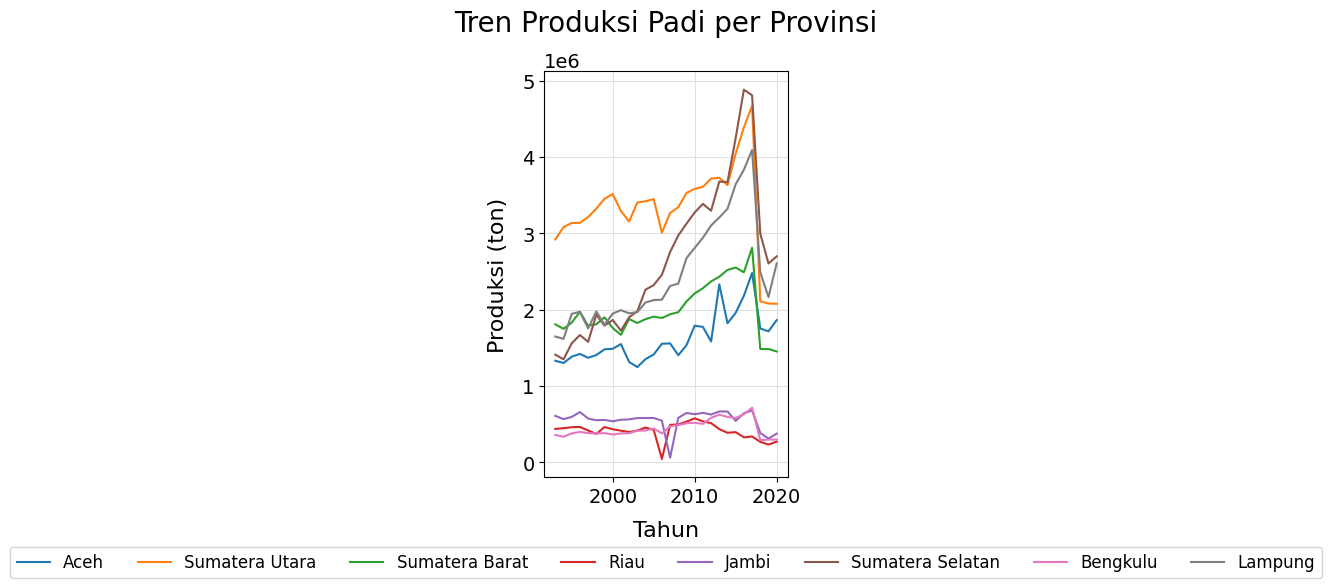

Daftar provinsi dalam dataset: ['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi'
 'Sumatera Selatan' 'Bengkulu' 'Lampung']


In [8]:
# Melihat tren produksi per provinsi seiring waktu
provinsi_list = df['Provinsi'].unique()

fig, ax = plt.subplots(figsize=(9, 6))
for provinsi in provinsi_list:
    provinsi_data = df[df['Provinsi'] == provinsi]
    ax.plot(provinsi_data['Tahun'], provinsi_data['Produksi'], label=provinsi)

ax.set_xlabel('Tahun', labelpad=10)
ax.set_ylabel('Produksi (ton)', labelpad=10)
ax.set_title('Tren Produksi Padi per Provinsi', pad=15)
ax.grid(True, color='#E0E0E0')
ax.set_axisbelow(True)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(provinsi_list))
plt.tight_layout()
plt.show()

print("Daftar provinsi dalam dataset:", provinsi_list)

# **Production Trends by Province:**
- Provinces like **Sumatera Utara and Lampung** exhibit **consistent growth in production**, while others, like Riau, have **unstable patterns**, possibly due to **climate variability or infrastructure issues**.
- A **sharp decline around 2020** may indicate **climate-related disruptions or policy changes**.

In [9]:
# Analisis regresi untuk melihat pengaruh faktor iklim terhadap produksi
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:               Produksi   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           7.86e-82
Time:                        07:18:23   Log-Likelihood:                -3249.9
No. Observations:                 224   AIC:                             6510.
Df Residuals:                     219   BIC:                             6527.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.183e+06   1.21e+06      1.

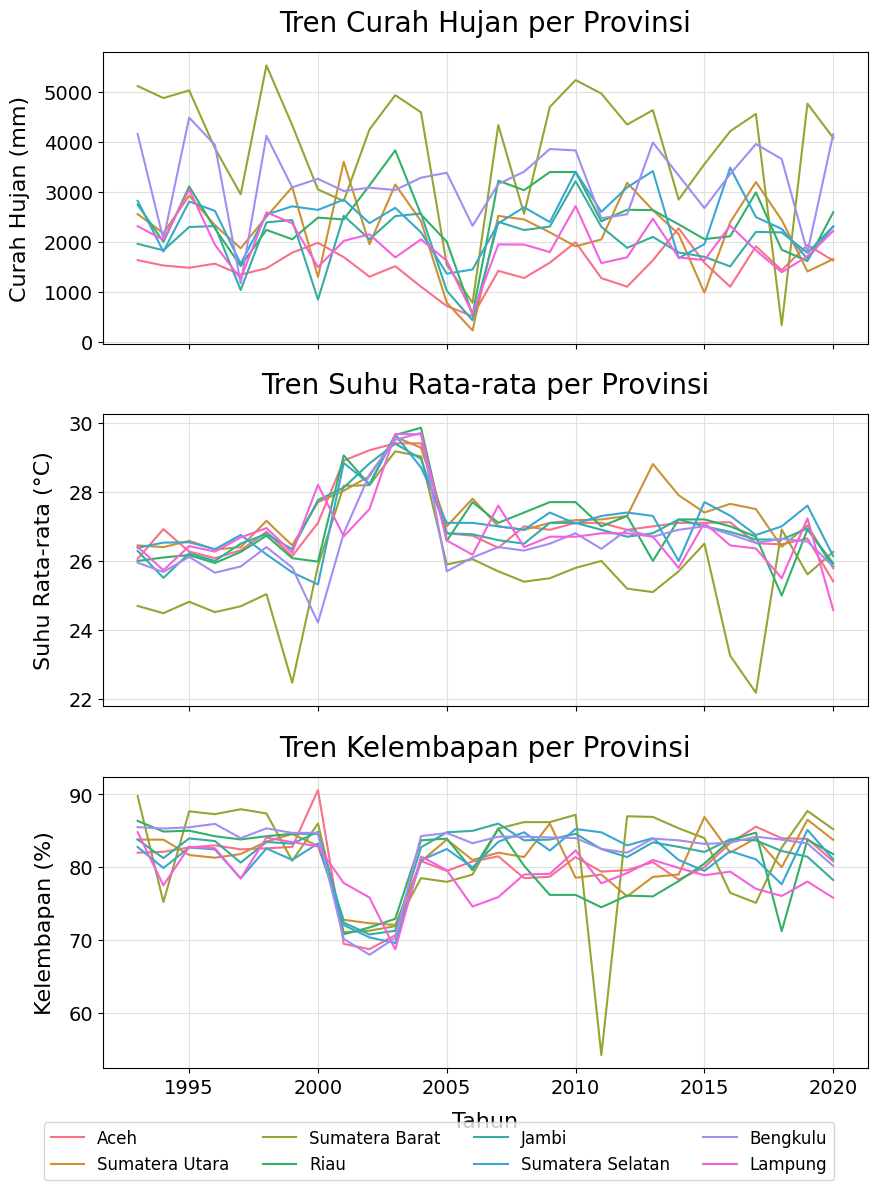

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains your data
# Define the list of provinces
provinsi_list = df['Provinsi'].unique()

# Define a color palette
colors = sns.color_palette("husl", len(provinsi_list))  # You can choose any palette you like

# Menambahkan konstanta untuk intercept
X = df[['Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Luas Panen']]
X = sm.add_constant(X)
y = df['Produksi']

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

# Analisis per provinsi
print("\nAnalisis Korelasi per Provinsi:")
for provinsi in provinsi_list:
    provinsi_data = df[df['Provinsi'] == provinsi]
    corr = provinsi_data[['Produksi', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']].corr().iloc[0]
    print(f"Provinsi: {provinsi}")
    print(f"Korelasi Produksi dengan Curah Hujan: {corr['Curah hujan']:.4f}")
    print(f"Korelasi Produksi dengan Kelembapan: {corr['Kelembapan']:.4f}")
    print(f"Korelasi Produksi dengan Suhu Rata-rata: {corr['Suhu rata-rata']:.4f}")

# Visualisasi tren curah hujan, suhu, dan kelembapan seiring waktu
fig, axes = plt.subplots(3, 1, figsize=(9, 12), sharex=True)

# Tren curah hujan
for i, provinsi in enumerate(provinsi_list):
    provinsi_data = df[df['Provinsi'] == provinsi]
    axes[0].plot(provinsi_data['Tahun'], provinsi_data['Curah hujan'],
                label=provinsi, color=colors[i % len(colors)])

axes[0].set_ylabel('Curah Hujan (mm)', labelpad=10)
axes[0].set_title('Tren Curah Hujan per Provinsi', pad=15)
axes[0].grid(True, color='#E0E0E0')
axes[0].set_axisbelow(True)

# Tren suhu
for i, provinsi in enumerate(provinsi_list):
    provinsi_data = df[df['Provinsi'] == provinsi]
    axes[1].plot(provinsi_data['Tahun'], provinsi_data['Suhu rata-rata'],
                label=provinsi, color=colors[i % len(colors)])

axes[1].set_ylabel('Suhu Rata-rata (°C)', labelpad=10)
axes[1].set_title('Tren Suhu Rata-rata per Provinsi', pad=15)
axes[1].grid(True, color='#E0E0E0')
axes[1].set_axisbelow(True)

# Tren kelembapan
for i, provinsi in enumerate(provinsi_list):
    provinsi_data = df[df['Provinsi'] == provinsi]
    axes[2].plot(provinsi_data['Tahun'], provinsi_data['Kelembapan'],
                label=provinsi, color=colors[i % len(colors)])

axes[2].set_xlabel('Tahun', labelpad=10)
axes[2].set_ylabel('Kelembapan (%)', labelpad=10)
axes[2].set_title('Tren Kelembapan per Provinsi', pad=15)
axes[2].grid(True, color='#E0E0E0')
axes[2].set_axisbelow(True)

# Legenda untuk semua subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

# **Unveiling the Impact of Climate Factors on Rice Production**

**A Comprehensive Exploration of OLS Regression and Provincial Correlation Analysis**

- The **Ordinary Least Squares (OLS)** **regression analysis** demonstrates that **82.6% of the variation in rice production** can be attributed to climate factors such as rainfall, humidity, average temperature, and harvested area. The **remaining 17.4% is influenced by external variables**, including fertilizer use and seed quality.

# **Key Insights:**

1. **Rainfall and humidity exhibit limited influence**, potentially due to advanced irrigation systems and adaptive farming techniques.

2. **Rising temperatures have a detrimental impact**, underscoring the vulnerability of rice production to climate change.

3. **The harvested area is the dominant factor**, as expanding the cultivated land directly enhances yields.

**Provincial Correlation Analysis Highlights:**

- **Regions with higher humidity tend to experience lower yields**, aligning with the negative coefficient for humidity.

- **Temperature spikes correlate with reduced production**, consistent with the OLS findings.

- **Larger harvested areas drive higher outputs**, reinforcing the significance of land expansion.

**The Broader Perspective:**

This analysis underscores the **critical need for climate adaptation strategies** to mitigate the adverse effects of rising temperatures. While expanding harvested areas remains an effective short-term solution, it is not a sustainable strategy for the future. Addressing **autocorrelation, multicollinearity, and data distribution challenges** will enhance model accuracy, empowering policymakers and farmers to make informed decisions for ensuring food security. 🌾📈

In [17]:
# Korelasi antara hasil produksi dan cuaca per provinsi
import seaborn as sns

provinsi_list = df['Provinsi'].unique()

# Membuat dataframe untuk menyimpan korelasi
corr_results = []
for prov in provinsi_list:
    prov_data = df[df['Provinsi'] == prov]
    corr = prov_data[['Produksi', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']].corr()
    corr_results.append({
        'Provinsi': prov,
        'Kor_Produksi_CurahHujan': corr.loc['Produksi', 'Curah hujan'],
        'Kor_Produksi_Kelembapan': corr.loc['Produksi', 'Kelembapan'],
        'Kor_Produksi_Suhu': corr.loc['Produksi', 'Suhu rata-rata']
    })

import pandas as pd
corr_df = pd.DataFrame(corr_results)
print('Korelasi per Provinsi antara Produksi dan Cuaca:')
print(corr_df)

Korelasi per Provinsi antara Produksi dan Cuaca:
           Provinsi  Kor_Produksi_CurahHujan  Kor_Produksi_Kelembapan  \
0              Aceh                 0.260797                 0.267916   
1    Sumatera Utara                 0.218717                -0.054884   
2    Sumatera Barat                 0.192276                -0.130178   
3              Riau                 0.658421                -0.047379   
4             Jambi                -0.026533                -0.016990   
5  Sumatera Selatan                 0.222967                 0.278140   
6          Bengkulu                 0.146444                 0.133998   
7           Lampung                -0.021481                -0.097360   

   Kor_Produksi_Suhu  
0          -0.235904  
1           0.393172  
2          -0.372093  
3           0.109718  
4           0.095710  
5           0.075218  
6           0.152247  
7          -0.182991  


# **Provincial Correlation Analysis: The Impact of Climate on Rice Production**

**Key Findings:**

1. **Rainfall's Mixed Impact:**

- Riau shows a strong positive correlation (0.658), suggesting rainfall boosts production.

- In Jambi and Lampung, the negative correlation indicates potential over-saturation or flooding effects.

2. **Humidity's Varied Influence:**

- Sumatera Selatan and Aceh show positive correlations, indicating that moderate humidity supports growth.

- Negative correlations in Sumatera Barat and Sumatera Utara suggest excessive humidity may hinder production.

3. **Temperature's Critical Role:**

- Sumatera Utara's positive correlation (0.393) suggests higher temperatures can enhance production.

- Aceh and Sumatera Barat show negative correlations, indicating heat stress reduces yield.

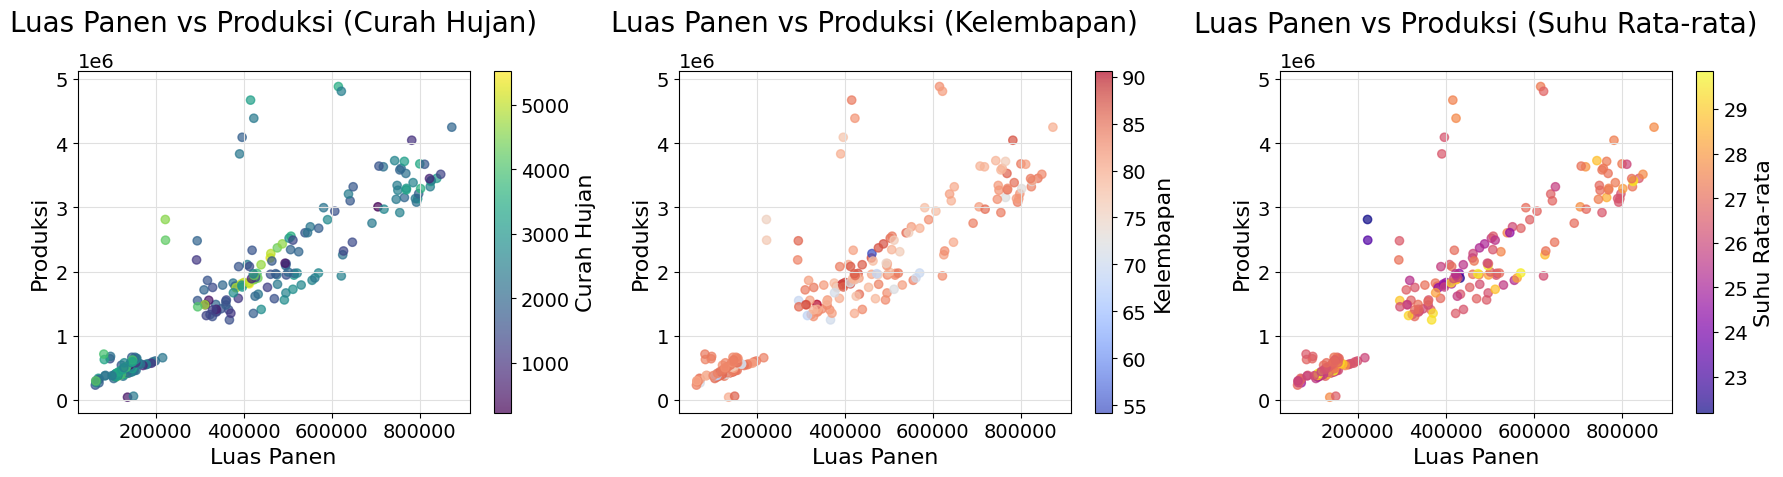

In [19]:
# Hubungan antara luas panen dan produksi padi terhadap iklim
# Scatter plot: Luas Panen vs Produksi, dengan warna berdasarkan cuaca (misalnya Curah Hujan), kita bisa membuat beberapa plot
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Plot Luas Panen vs Produksi dengan intensitas Curah Hujan
sc = axes[0].scatter(df['Luas Panen'], df['Produksi'], c=df['Curah hujan'], cmap='viridis', alpha=0.7)
axes[0].set_xlabel('Luas Panen')
axes[0].set_ylabel('Produksi')
axes[0].set_title('Luas Panen vs Produksi (Curah Hujan)', pad=15)
plt.colorbar(sc, ax=axes[0], label='Curah Hujan')

# Plot Luas Panen vs Produksi dengan intensitas Kelembapan
sc = axes[1].scatter(df['Luas Panen'], df['Produksi'], c=df['Kelembapan'], cmap='coolwarm', alpha=0.7)
axes[1].set_xlabel('Luas Panen')
axes[1].set_ylabel('Produksi')
axes[1].set_title('Luas Panen vs Produksi (Kelembapan)', pad=15)
plt.colorbar(sc, ax=axes[1], label='Kelembapan')

# Plot Luas Panen vs Produksi dengan intensitas Suhu Rata-rata
sc = axes[2].scatter(df['Luas Panen'], df['Produksi'], c=df['Suhu rata-rata'], cmap='plasma', alpha=0.7)
axes[2].set_xlabel('Luas Panen')
axes[2].set_ylabel('Produksi')
axes[2].set_title('Luas Panen vs Produksi (Suhu Rata-rata)', pad=15)
plt.colorbar(sc, ax=axes[2], label='Suhu Rata-rata')

plt.tight_layout()
plt.show()

# **Analysis of the Provincial Correlation and Visual Insights:**
1. **Rainfall vs Production:** The scatter plot shows a moderate positive correlation. Provinces with higher rainfall tend to produce more, although some outliers suggest that excessive rainfall may not always boost production.
2. **Humidity vs Production:** The correlation is relatively weak. Certain regions with high humidity still exhibit lower production, indicating that humidity alone is not a major factor in boosting yields.
3. **Temperature vs Production:** A negative correlation is observed. Higher temperatures seem to reduce production, highlighting the vulnerability of rice crops to rising temperatures.
- **Key Insight:**
The **harvest area remains the dominant factor** influencing production. However, **climate factors like temperature and rainfall** also play a significant role in specific regions. Effective climate adaptation strategies are crucial to mitigate the adverse effects of temperature rise on agricultural output.

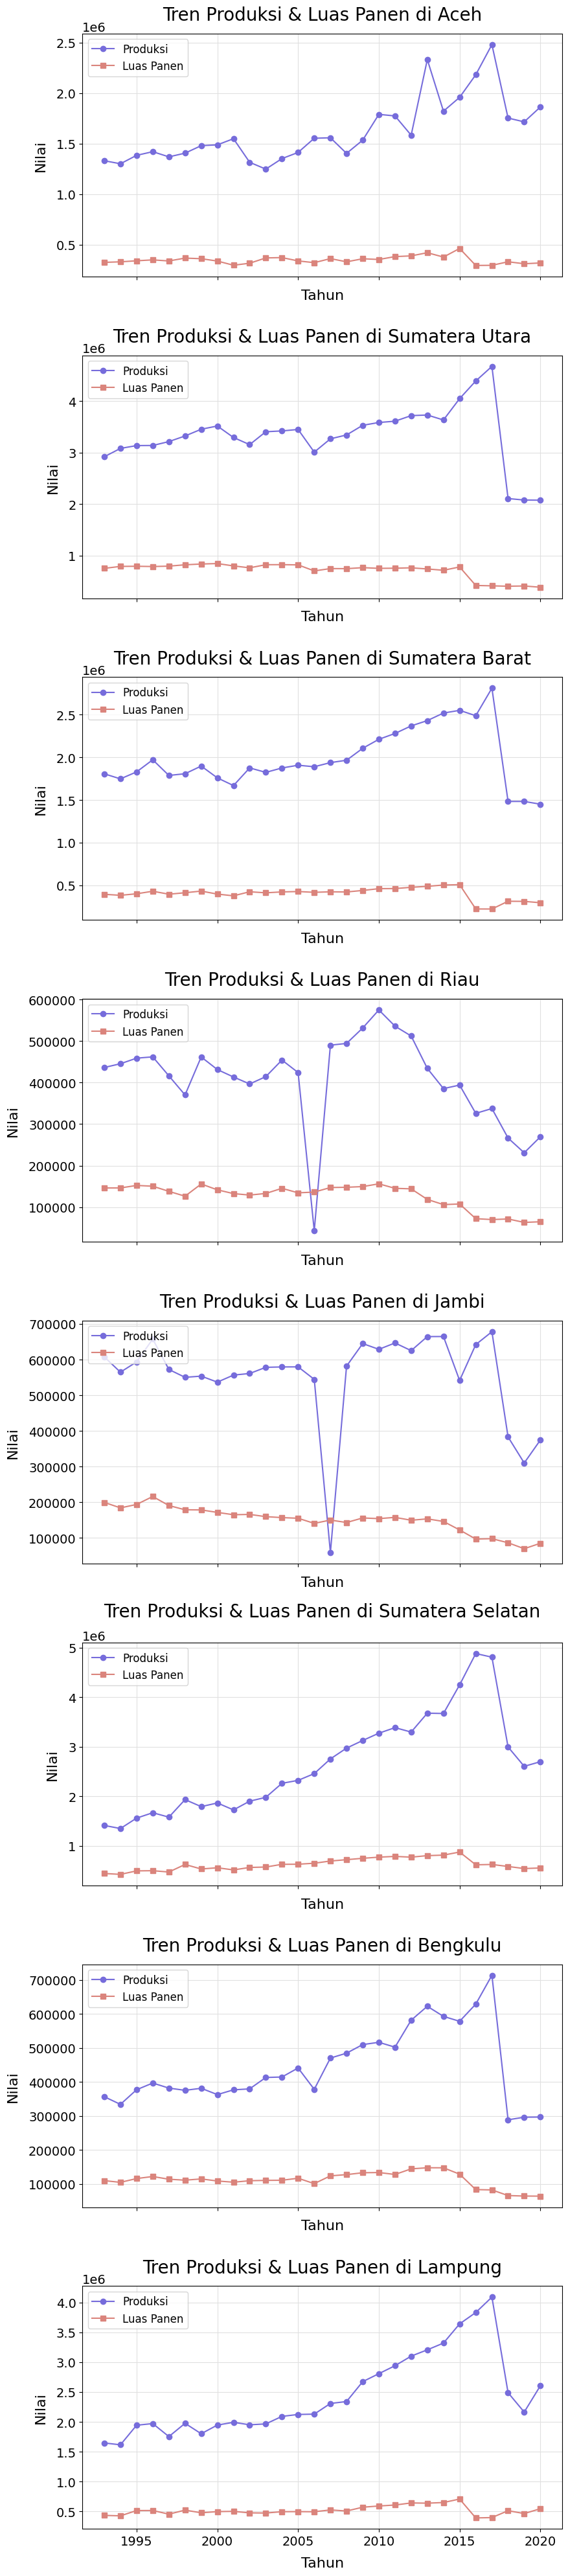

In [20]:
# Tren produksi setiap provinsi yang berhubungan dengan luas panen
# Kita dapat menampilkan grafik garis untuk masing-masing provinsi dari waktu ke waktu untuk kedua variabel
fig, axes = plt.subplots(len(provinsi_list), 1, figsize=(9, 5*len(provinsi_list)), sharex=True)

if len(provinsi_list) == 1:
    axes = [axes]

for i, prov in enumerate(provinsi_list):
    prov_data = df[df['Provinsi'] == prov].sort_values('Tahun')
    ax = axes[i]
    ax.plot(prov_data['Tahun'], prov_data['Produksi'], label='Produksi', color='#766CDB', marker='o')
    ax.plot(prov_data['Tahun'], prov_data['Luas Panen'], label='Luas Panen', color='#DA847C', marker='s')
    ax.set_title('Tren Produksi & Luas Panen di ' + prov, pad=15)
    ax.set_xlabel('Tahun', labelpad=10)
    ax.set_ylabel('Nilai', labelpad=10)
    ax.grid(True, color='#E0E0E0')
    ax.set_axisbelow(True)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# **Trend Analysis of Rice Production and Harvested Area by Province:**
1. **Aceh:** A gradual increase in production is observed, while the harvested area remains relatively stable. This indicates improvements in productivity.
2. **North Sumatra (Sumatera Utara):** A consistent upward trend in production until a sudden drop in recent years. The harvested area also shows a slight decline.
3. **West Sumatra (Sumatera Barat):** Production steadily rises, but a sharp decline in the final years suggests potential climate-related or policy-driven disruptions. The harvested area remains stable.
4. **Riau:** Production fluctuates significantly, with a noticeable drop around the mid-2010s. The harvested area remains stable but with minor fluctuations.
5. **Jambi:** A stable production trend is followed by a sudden drop, reflecting possible climate shocks or external disruptions. The harvested area shows a similar declining trend.
6. **South Sumatra (Sumatera Selatan):** A consistent upward trend in production, with the harvested area remaining relatively stable, indicating higher productivity.
7. **Bengkulu:** A gradual increase in production followed by a sharp decline. The harvested area remains stable with a slight downward trend.
8. **Lampung:** A significant increase in production over the years, but a steep drop at the end. The harvested area is relatively stable but slightly decreases over time.
- **Key Insight:**
The **decline in production across multiple provinces in recent years** suggests potential external shocks, such as **climate change, policy shifts, or pest infestations**. Despite stable harvested areas, **productivity gains are not sustained**, highlighting the need for **climate adaptation strategies and sustainable farming practices**.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
# Prepare features and target
X = df[['Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']]
y = df['Produksi']

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

<ipython-input-26-93cbd7c61f6a>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis', ax=ax2)


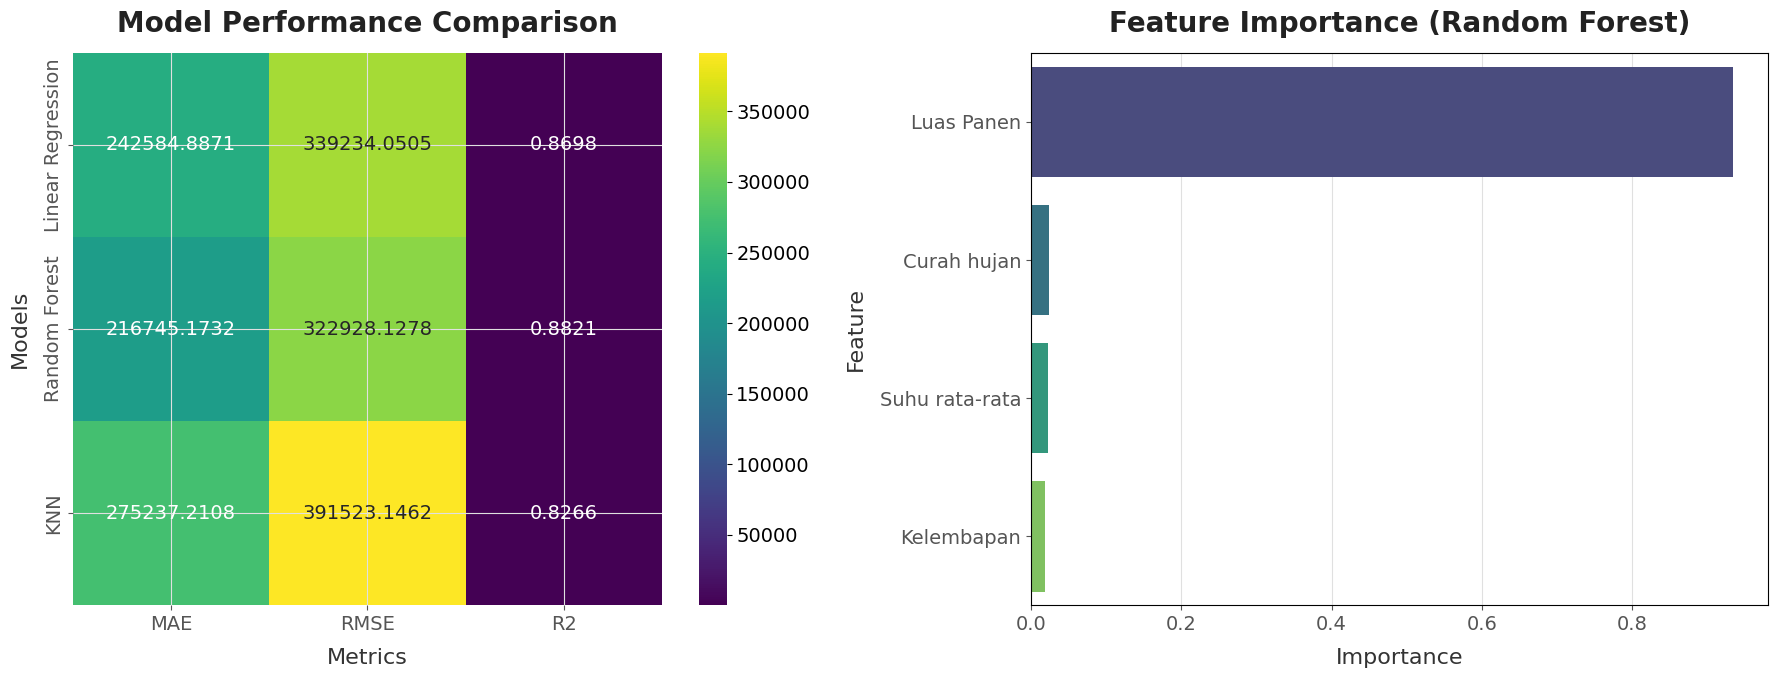

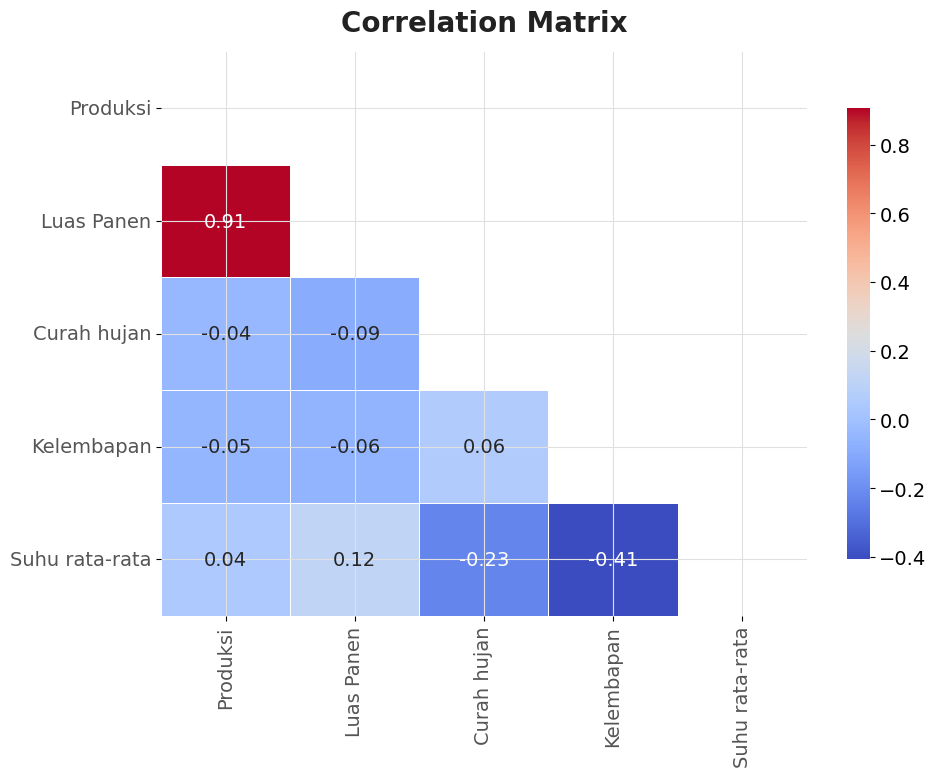

In [26]:
# Train and evaluate models
results = {}
predictions = {}
feature_importances = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mae = -cv_scores.mean()

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'CV_MAE': cv_mae
    }

    # Get feature importances (for Random Forest)
    if name == 'Random Forest':
        feature_importances[name] = {feature: importance for feature, importance in
                                    zip(X.columns, model.feature_importances_)}
    # For Linear Regression, use coefficients
    elif name == 'Linear Regression':
        feature_importances[name] = {feature: abs(coef) for feature, coef in
                                    zip(X.columns, model.coef_)}
    # For KNN, we don't have direct feature importances, so we'll use a placeholder
    else:
        feature_importances[name] = {feature: np.nan for feature in X.columns}

# Create heatmap of model performance
metrics_to_plot = ['MAE', 'RMSE', 'R2']
heatmap_data = pd.DataFrame({
    model_name: {metric: results[model_name][metric] for metric in metrics_to_plot}
    for model_name in models.keys()
}).T

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot heatmap of model performance
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.4f', ax=ax1)
ax1.set_title('Model Performance Comparison', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax1.set_xlabel('Metrics', fontsize=16, color='#333333', labelpad=10)
ax1.set_ylabel('Models', fontsize=16, color='#333333', labelpad=10)
ax1.tick_params(axis='both', labelsize=14, colors='#555555')
# Plot feature importances for Random Forest (the best model based on R2)
feature_imp_df = pd.DataFrame({
    'Feature': list(feature_importances['Random Forest'].keys()),
    'Importance': list(feature_importances['Random Forest'].values())
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis', ax=ax2)
ax2.set_title('Feature Importance (Random Forest)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax2.set_xlabel('Importance', fontsize=16, color='#333333', labelpad=10)
ax2.set_ylabel('Feature', fontsize=16, color='#333333', labelpad=10)
ax2.tick_params(axis='both', labelsize=14, colors='#555555')
ax2.grid(axis='x', color='#E0E0E0')
ax2.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xticks(fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.tight_layout()
plt.show()

# **Model Performance Analysis:**
1. **Model Performance Comparison (Left Heatmap):**
- The **Random Forest model** has the lowest MAE (216,745.17) and RMSE (322,928.13), along with the highest R² score (0.8821), indicating that it performs the best among the three models.
- **Linear Regression** performs moderately well, but with slightly higher errors and a lower R² score (0.8698).
- **K-Nearest Neighbors (KNN)** shows the worst performance with the highest MAE (275,237.21) and RMSE (391,523.15), and the lowest R² score (0.8266).
2. **Feature Importance from Random Forest (Right Bar Chart):**
- **"Luas Panen" (Harvested Area)** is the most influential feature, significantly contributing to the model’s performance.
- Other factors like **rainfall (Curah Hujan), average temperature (Suhu Rata-rata), and humidity (Kelembapan)** have relatively minor impacts.

**Conclusion:**
- The **Random Forest model** is the most suitable for predicting rice production due to its superior performance.
- The dominance of **"Luas Panen" (Harvested Area)** as a key feature suggests that increasing the harvested area has the highest impact on production, while weather variables contribute less.

# **Correlation Matrix Analysis:**
1. **Strong Positive Correlation:**
The correlation between **"Produksi" (Production) and "Luas Panen" (Harvested Area) is 0.91**, indicating a very strong positive relationship. This aligns with the feature importance plot from the Random Forest model, confirming that the harvested area significantly influences production.
2. **Weak and Negative Correlations:**
- Other features like **"Curah Hujan" (Rainfall), "Kelembapan" (Humidity), and "Suhu Rata-rata" (Average Temperature)** show weak and slightly negative correlations with production.
- For example, the correlation between **"Curah Hujan" and "Suhu Rata-rata" is -0.23, while "Kelembapan" and "Suhu Rata-rata" have a -0.41** correlation, which indicates an inverse relationship.
3. **Implication for Modeling:**
- Since **"Luas Panen" (Harvested Area)** is the dominant factor, while weather variables have minimal impact, the model's performance is heavily driven by this feature.
- The weak correlation of weather variables suggests they might not add much predictive power to the model.

**Conclusion:**
The high correlation between **"Produksi" (Production) and "Luas Panen" (Harvested Area)** justifies the Random Forest model’s feature importance results. However, weather-related variables may introduce noise rather than meaningful patterns.